In [173]:
import numpy as np
from itertools import compress

In [174]:
class Graph:
    """
        Class representing an undirected graph structure. Takes one optional argument,
        gtype, denoting if the graph shoulb be weighted or not ('Unweighted' by default, can be set as 'Weighted').
        
        Params:
            self.veritces - vertex list,
            self.edges - edge list,
            self.type - graph type (weighted/unweighted).
    """
    
    def __init__(self, gtype = 'Unweighted'): # unweighted by default
        self.vertices = []
        self.edges = []
        self.type = gtype
    
    def addVertex(self, vert):
        """
            Adds new vertex to the graph. Takes one argument, vert, representing the vertex to add (can be of any type).
            If vert already exists in the graph, it won't be doubled.
        """
        
        self.vertices.append(vert)
        self.vertices = list(set(self.vertices)) # remove duplicates
        
    def addVerticesFromList(self, vertList):
        """
            Adds vertices from list to the graph. Takes one argument, vertList, representing the vertices to add 
            (has to be of type list). If any of the vertices already exist, they won't be doubled.
        """
        
        assert type(vertList) == list
        assert len(vertList) > 0
        self.vertices.extend(vertList)
        self.vertices = list(set(self.vertices))
    
    def addEdge(self, fromVert, toVert, weight = None):  
        """
            Adds new edge to the graph. Takes two required arguments, fromVert and toVert, representing the vertices on both 
            sides of the edge to add (can be of any type) and one optional argument, weight, representing weight of the edge
            (has to be of type float).
            If edge already exists in the graph, it won't be doubled.
        """
        
        if self.vertices.count(fromVert) == 0:
            self.vertices.append(fromVert)
        elif self.vertices.count(toVert) == 0:
            self.vertices.append(toVert)
        
        if self.type == 'Weighted':
            assert type(weight) == float
            edges = [list(i.keys())[0] for i in self.edges]
            edge = (fromVert, toVert)
            if edges.count(edge[::-1]) > 0 or edges.count(edge) > 0: # check if reverse or duplicate edge exists
                pass 
            else:
                edge = {(fromVert, toVert):weight}
                self.edges.append(edge)
                
        elif self.type == 'Unweighted':
            edge = (fromVert, toVert)
            if self.edges.count(edge[::-1]) > 0 or self.edges.count(edge) > 0:
                pass
            else:
                self.edges.append(edge)
    
    def addEdgesFromList(self, edgeList, weightList = None):
        """
            Adds edges from list to the graph. Takes one required argument, edgeList, representing the edges to add 
            (has to be of type list), and one optional argument, weightList, representing weigths of the edges
            (has to be list of floats). 
            If any of the vertices already exist, they won't be doubled.
        """
        
        assert type(edgeList) == list
        assert len(edgeList) > 0
        assert all(isinstance(i, tuple) for i in edgeList)
        assert all(len(i) == 2 for i in edgeList)
        
        verts1 = set([item for i in edgeList for item in i]) # convert list of tuples to list, use set to extract unique
        verts2 = set(self.vertices)
        diff = list(verts1 - verts2) # check if all vertices from edgeList are in the self.vertices list
        if len(diff) > 0:
            self.vertices.extend(diff) # if not, extend the self.vertices list
        
        if self.type == 'Weighted':
            assert all(isinstance(i, float) for i in weightList)
            assert len(weightList) == len(edgeList)
            edges = [list(i.keys())[0] for i in self.edges]
            no_duplicate = [edges.count(edgeList[i]) == 0 for i in range(len(edgeList))] # filter out duplicate edges
            edgeList = list(compress(edgeList, no_duplicate))
            weightList = list(compress(weightList, no_duplicate))
            no_reverse = [edges.count(edgeList[i][::-1]) == 0 for i in range(len(edgeList))] # filter out reverse edges
            edgeList = list(compress(edgeList, no_reverse))
            weightList = list(compress(weightList, no_reverse))
            self.edges.extend([{edgeList[i]:weightList[i]} for i in range(len(edgeList))])
            
        elif self.type == 'Unweighted':
            no_duplicate = [self.edges.count(edgeList[i]) == 0 for i in range(len(edgeList))]
            edgeList = list(compress(edgeList, no_duplicate))
            no_reverse = [self.edges.count(edgeList[i][::-1]) == 0 for i in range(len(edgeList))]
            edgeList = list(compress(edgeList, no_reverse))
            self.edges.extend(edgeList)
 
    def getVertices(self):
        """
            Returns list of vertices.
        """
        
        return self.vertices
    
    def getEdges(self):
        """
            Returns list of edges.
        """
        
        return self.edges
    
    def getNeighbours(self, vertKey):
        """
            Returns list of neighbours for given vertex - vertKey.
        """
        
        assert vertKey in self.vertices
        
        if self.type == 'Weighted':
            edges = [list(i.keys())[0] for i in self.edges]
            contains = [vertKey in i for i in edges]
            pairs = list(compress(edges, contains))
            singles = [item for i in pairs for item in i]
            is_neighbour = [i != vertKey for i in singles]
            neighbours = list(compress(singles, is_neighbour))
        
        elif self.type == 'Unweighted':
            contains = [vertKey in i for i in self.edges]
            pairs = list(compress(self.edges, contains))
            singles = [item for i in pairs for item in i]
            is_neighbour = [i != vertKey for i in singles]
            neighbours = list(compress(singles, is_neighbour))
            
        return neighbours
    
    def inGraph(self, vertKey):
        """
            Returns True if vertex (vertKey) in graph and False otherwise.
        """
        
        if self.vertices.count(vertKey) > 0:
            return True
        else:
            return False
        
    def saveGraph(self, filename, graphname):
        """
            Writes DOT representation of graph to .txt file. Takes two arguments - filename, denoting name 
            of the resulting file and graphname, denoting name of the graph (both have to be of type string).
        """
        
        if self.type == 'Weighted':
            edges = [list(i.keys())[0] for i in self.edges]
            weights = [list(i.values())[0] for i in self.edges]
            f = open(filename + '.txt', 'w')
            f.write('graph ' + graphname + ' {\n')
            for i in range(len(edges)):
                f.write('\t' + str(edges[i][0]) + ' -- ' + str(edges[i][1]) + ' [label=' + str(weights[i]) + '];\n')
            f.write('}')
            f.close()
            
        elif self.type == 'Unweighted':
            f = open(filename + '.txt', 'w')
            f.write('graph ' + graphname + ' {\n')
            for i in self.edges:
                f.write('\t' + str(i[0]) + ' -- ' + str(i[1]) + ';\n')
            f.write('}')
            f.close()
            
    def getShortestPaths(self, vertKey):
        """
            Calculates shortest paths from given vertex (vertKey) to all other vertices. 
        """
        
        paths = {vertKey: 0}
        neighbours = self.getNeighbours(vertKey) 
        c = 1
        while len(neighbours) > 0:
            add_paths = {i: c for i in neighbours}
            paths.update(add_paths)
            n = len(neighbours)
            for i in range(n):
                nbr = neighbours[i]
                next_nbrs = self.getNeighbours(nbr)
                in_paths = [j not in paths.keys() for j in next_nbrs]
                keepers = list(compress(next_nbrs, in_paths))
                neighbours.extend(keepers)
            neighbours = neighbours[n:]
            c += 1
        return paths

In [175]:
g = Graph()

In [176]:
g.addVertex('Alice')
g.getVertices()

['Alice']

In [177]:
g.addVerticesFromList(['Alice', 'Bob', 'Carl'])
g.getVertices()

['Bob', 'Alice', 'Carl']

In [178]:
g.addEdge('Alice', 'Bob')
g.getEdges()

[('Alice', 'Bob')]

In [179]:
g.addEdgesFromList([('Bob','Alice'),
                  ('Alice', 'Carl'),
                  ('Alice', 'David'),
                  ('Alice', 'Ernst'),
                  ('Alice', 'Frank'),
                  ('Bob', 'Gail'),
                  ('Gail', 'Harry'),
                  ('Harry', 'Jane'),
                  ('Jane', 'Gail'),
                  ('Harry', 'Irene'),
                  ('Irene', 'Gail'),
                  ('Irene', 'Jane'),
                  ('Ernst', 'Frank'),
                  ('David', 'Carl'),
                  ('Carl', 'Frank')
                 ])
g.getEdges()

[('Alice', 'Bob'),
 ('Alice', 'Carl'),
 ('Alice', 'David'),
 ('Alice', 'Ernst'),
 ('Alice', 'Frank'),
 ('Bob', 'Gail'),
 ('Gail', 'Harry'),
 ('Harry', 'Jane'),
 ('Jane', 'Gail'),
 ('Harry', 'Irene'),
 ('Irene', 'Gail'),
 ('Irene', 'Jane'),
 ('Ernst', 'Frank'),
 ('David', 'Carl'),
 ('Carl', 'Frank')]

In [180]:
g.getVertices()

['Bob',
 'Alice',
 'Carl',
 'Frank',
 'Gail',
 'David',
 'Harry',
 'Irene',
 'Jane',
 'Ernst']

In [181]:
[g.inGraph('Alice'), g.inGraph('Charlie')]

[True, False]

In [182]:
g.getNeighbours('Alice')

['Bob', 'Carl', 'David', 'Ernst', 'Frank']

In [183]:
g.saveGraph('lab2task1', 'graph1')

In [184]:
g.getShortestPaths('Alice')

{'Alice': 0,
 'Bob': 1,
 'Carl': 1,
 'David': 1,
 'Ernst': 1,
 'Frank': 1,
 'Gail': 2,
 'Harry': 3,
 'Jane': 3,
 'Irene': 3}

In [185]:
f = open('lab2task1.txt', 'r')
file_contents = f.read()
print(file_contents)
f.close()

graph graph1 {
	Alice -- Bob;
	Alice -- Carl;
	Alice -- David;
	Alice -- Ernst;
	Alice -- Frank;
	Bob -- Gail;
	Gail -- Harry;
	Harry -- Jane;
	Jane -- Gail;
	Harry -- Irene;
	Irene -- Gail;
	Irene -- Jane;
	Ernst -- Frank;
	David -- Carl;
	Carl -- Frank;
}


Output from http://www.webgraphviz.com/: <br>

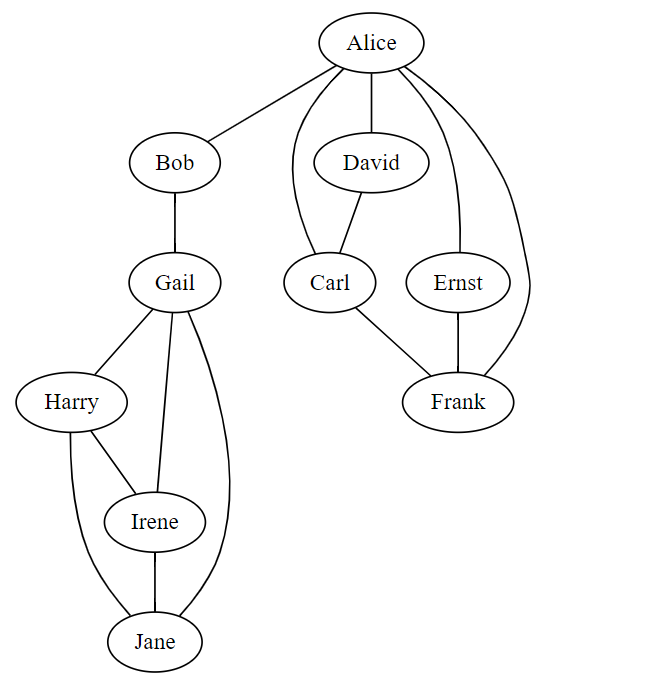

In [186]:
g1 = Graph(gtype='Weighted')

In [187]:
g1.addVertex('a')
g1.getVertices()

['a']

In [188]:
g1.addVerticesFromList(['a', 'b'])
g1.getVertices()

['b', 'a']

In [189]:
g1.addEdge('a', 'b', weight=1/2)
g1.getEdges()

[{('a', 'b'): 0.5}]

In [190]:
g1.addEdgesFromList([('a', 'b'), ('b', 'c'), ('b', 'd')], [1/2, 1/4, 1/4])
g1.getEdges()

[{('a', 'b'): 0.5}, {('b', 'c'): 0.25}, {('b', 'd'): 0.25}]

In [191]:
g1.getVertices()

['b', 'a', 'd', 'c']

In [192]:
[g1.inGraph('a'), g1.inGraph('e')]

[True, False]

In [193]:
g1.getNeighbours('b')

['a', 'c', 'd']

In [194]:
g1.saveGraph('lab2task1b', 'graph2')

In [195]:
g1.getShortestPaths('d')

{'d': 0, 'b': 1, 'a': 2, 'c': 2}

In [196]:
f = open('lab2task1b.txt', 'r')
file_contents = f.read()
print(file_contents)
f.close()

graph graph2 {
	a -- b [label=0.5];
	b -- c [label=0.25];
	b -- d [label=0.25];
}


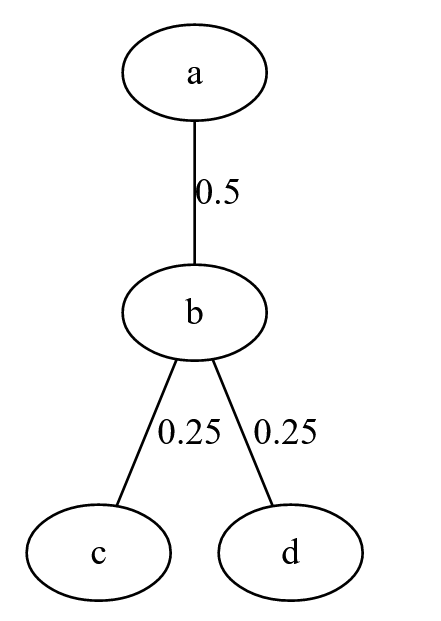